### `NOTE / WARNING : My visualizations below are ... not good yet. I'm working on them to more accurately reflect what's in the data- especially the plot that's included in my Sprint 1 slide presentation. I included that plot because I found it interesting, but still debugging the groupby on 'Cab_Type' and 'Name' to display the correct distinct bar colors for each app and their respective cab service 'Name' types. It's close. Also looking to get the distribution subplot done immediately as well especially for all 8 weather variables.`

Rough draft file; finalize in Jupyter Notebook - probably in my_env ✅


#### Data Dictionary

To assist with analysis, please see the data dictionary below. 

Cab Ride & Customer Data:
- Distance (numeric)
- Cab_Type (categorical)
- Name: Cab service name (categorical, note: 'WAV' means Wheelchair accessible vehicles. 'Taxi' means rider hails taxi cab using Uber's app')
- Product_ID: service type ID (numeric)
- Time_Stamp: (numeric)
- Source / Pickup Location: (categorical)
- Destination: (categorical)
- Price (numeric)
- Surge_Multiplier (numeric)
- ID: transaction ID (numeric)

Weather Data:
- Temp: temperature in F (numeric)
- Location: Location name (categorical)
- Clouds: clouds observed (categorical)
- Pressure: air pressure, in millibars, mb (numeric)
- Rain: in inches, for the last hour (numeric)
- Time_stamp: epoch time when row data was collected (numeric)
- Humidity: humidity in % (numeric)
- Wind: wind speed in mph (numeric)

Field of Interest:
- Price: (numeric)

### Question of Interest

Imagine Considering the all the variables that influence the price of cab rides in most cities, the following is to be evaluated: How do factors like weather, time of day, location, and cab type offering affect the price of a cab ride on the Uber & Lyft platforms?

> 💡<u>Additional Note to Consider:</u> Are there best practices or guidelines that all Uber & Lyft drivers can adhere to, regardless of their market, to increase efficiency in their drive times? Are there recommendations available that advise drivers, whether they're new to rideshare service or have experience, on how to make the most on their shifts? 

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv(r"C:\Users\garre\OneDrive\Documents\BrainStation Real\Capstone\Uber & Lyft Dataset\Uber & Lyft Dataset from Kaggle\Garrett's version of the data\cab_rides(version you touched).csv")
df.head()

,Distance,Cab_Type,Name,Product_ID,Time_Stamp,Source / Pickup Location,Destination,Price,Surge_Multiplier,ID,Unnamed: 10
0,0.44,Lyft,Shared,lyft_line,1.540000e+12,Haymarket Square,North Station,5.0,1.0,424553bb-7174-41ea-aeb4-fe06d4f4b9d7,NaN
1,0.44,Lyft,Lux,lyft_premier,1.540000e+12,Haymarket Square,North Station,11.0,1.0,4bd23055-6827-41c6-b23b-3c491f24e74d,NaN
2,0.44,Lyft,Lyft,lyft,1.540000e+12,Haymarket Square,North Station,7.0,1.0,981a3613-77af-4620-a42a-0c0866077d1e,NaN
3,0.44,Lyft,Lux Black XL,lyft_luxsuv,1.540000e+12,Haymarket Square,North Station,26.0,1.0,c2d88af2-d278-4bfd-a8d0-29ca77cc5512,NaN
4,0.44,Lyft,Lyft XL,lyft_plus,1.540000e+12,Haymarket Square,North Station,9.0,1.0,e0126e1f-8ca9-4f2e-82b3-50505a09db9a,NaN


In [3]:
df2 = pd.read_csv(r"C:\Users\garre\OneDrive\Documents\BrainStation Real\Capstone\Uber & Lyft Dataset\Uber & Lyft Dataset from Kaggle\Garrett's version of the data\weather (version you touched).csv")
df2.head(5)

,Temp,Location,Clouds,Pressure,Rain,Time_Stamp,Humidity,Wind
0,42.42,Back Bay,1.0,1012.14,0.1228,1545003901,0.77,11.25
1,42.43,Beacon Hill,1.0,1012.15,0.1846,1545003901,0.76,11.32
2,42.50,Boston University,1.0,1012.15,0.1089,1545003901,0.76,11.07
3,42.11,Fenway,1.0,1012.13,0.0969,1545003901,0.77,11.09
4,43.13,Financial District,1.0,1012.14,0.1786,1545003901,0.75,11.49


### Data Cleaning

cab_rides dataset - .shape, .size, .column names, .info(), and dTypes

In [4]:
#Looking at shape and size 
print(f'The cab_rides dataset consists of {df.shape[0]} rows and {df.shape[1]} columns.')
print(f'The cab_rides dataset consists of {df.size} elements.')


The cab_rides dataset consists of 693071 rows and 11 columns.
The cab_rides dataset consists of 7623781 elements.


In [5]:
# check column names
df.columns

Index(['Distance', 'Cab_Type', 'Name', 'Product_ID', 'Time_Stamp',
       'Source / Pickup Location', 'Destination', 'Price', 'Surge_Multiplier',
       'ID', 'Unnamed: 10'],
      dtype='object')

In [6]:
# check for data types
df.dtypes

Distance                    float64
Cab_Type                     object
Name                         object
Product_ID                   object
Time_Stamp                  float64
Source / Pickup Location     object
Destination                  object
Price                       float64
Surge_Multiplier            float64
ID                           object
Unnamed: 10                 float64
dtype: object

In [7]:
# Next, look at datatypes AND nulls with df.info()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 693071 entries, 0 to 693070
Data columns (total 11 columns):
 #   Column                    Non-Null Count   Dtype  
---  ------                    --------------   -----  
 0   Distance                  693071 non-null  float64
 1   Cab_Type                  693071 non-null  object 
 2   Name                      693071 non-null  object 
 3   Product_ID                693071 non-null  object 
 4   Time_Stamp                693071 non-null  float64
 5   Source / Pickup Location  693071 non-null  object 
 6   Destination               693071 non-null  object 
 7   Price                     637976 non-null  float64
 8   Surge_Multiplier          693071 non-null  float64
 9   ID                        693071 non-null  object 
 10  Unnamed: 10               1 non-null       float64
dtypes: float64(5), object(6)
memory usage: 58.2+ MB


In [8]:
df.describe()

,Distance,Time_Stamp,Price,Surge_Multiplier,Unnamed: 10
count,693071.000000,6.930710e+05,637976.000000,693071.000000,1.0
mean,2.189430,1.541242e+12,16.545125,1.013870,410599.0
std,1.138937,3.298634e+09,9.324359,0.091641,NaN
min,0.020000,1.540000e+12,2.500000,1.000000,410599.0
25%,1.280000,1.540000e+12,9.000000,1.000000,410599.0
50%,2.160000,1.540000e+12,13.500000,1.000000,410599.0
75%,2.920000,1.540000e+12,22.500000,1.000000,410599.0
max,7.860000,1.550000e+12,97.500000,3.000000,410599.0


In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Distance,693071.0,2.189430e+00,1.138937e+00,2.000000e-02,1.280000e+00,2.160000e+00,2.920000e+00,7.860000e+00
Time_Stamp,693071.0,1.541242e+12,3.298634e+09,1.540000e+12,1.540000e+12,1.540000e+12,1.540000e+12,1.550000e+12
Price,637976.0,1.654513e+01,9.324359e+00,2.500000e+00,9.000000e+00,1.350000e+01,2.250000e+01,9.750000e+01
Surge_Multiplier,693071.0,1.013870e+00,9.164126e-02,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,3.000000e+00
Unnamed: 10,1.0,4.105990e+05,NaN,4.105990e+05,4.105990e+05,4.105990e+05,4.105990e+05,4.105990e+05


 weather dataset - .shape, .size, .column names, .info(), and dTypes

In [10]:
#Looking at shape and size 
print(f'The weather dataset consists of {df2.shape[0]} rows and {df2.shape[1]} columns.')
print(f'The weather dataset consists of {df2.size} elements.')


The weather dataset consists of 6276 rows and 8 columns.
The weather dataset consists of 50208 elements.


In [11]:
# check column names
df2.columns

Index(['Temp', 'Location', 'Clouds', 'Pressure', 'Rain', 'Time_Stamp',
       'Humidity', 'Wind'],
      dtype='object')

In [12]:
# check for data types
df2.dtypes

Temp          float64
Location       object
Clouds        float64
Pressure      float64
Rain          float64
Time_Stamp      int64
Humidity      float64
Wind          float64
dtype: object

In [13]:
#Next, look at datatypes AND nulls with the df.info()
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6276 entries, 0 to 6275
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Temp        6276 non-null   float64
 1   Location    6276 non-null   object 
 2   Clouds      6276 non-null   float64
 3   Pressure    6276 non-null   float64
 4   Rain        894 non-null    float64
 5   Time_Stamp  6276 non-null   int64  
 6   Humidity    6276 non-null   float64
 7   Wind        6276 non-null   float64
dtypes: float64(6), int64(1), object(1)
memory usage: 392.4+ KB


In [14]:
df2.describe()

,Temp,Clouds,Pressure,Rain,Time_Stamp,Humidity,Wind
count,6276.000000,6276.000000,6276.000000,894.000000,6.276000e+03,6276.000000,6276.000000
mean,39.090475,0.677777,1008.445209,0.057652,1.543857e+09,0.763985,6.802812
std,6.022055,0.314284,12.870775,0.100758,6.659340e+05,0.127340,3.633466
min,19.620000,0.000000,988.250000,0.000200,1.543204e+09,0.450000,0.290000
25%,36.077500,0.440000,997.747500,0.004900,1.543387e+09,0.670000,3.517500
50%,40.130000,0.780000,1007.660000,0.014850,1.543514e+09,0.760000,6.570000
75%,42.832500,0.970000,1018.480000,0.060925,1.544691e+09,0.890000,9.920000
max,55.410000,1.000000,1035.120000,0.780700,1.545159e+09,0.990000,18.180000


In [15]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
Temp,6276.0,3.909047e+01,6.022055,1.962000e+01,3.607750e+01,4.013000e+01,4.283250e+01,5.541000e+01
Clouds,6276.0,6.777772e-01,0.314284,0.000000e+00,4.400000e-01,7.800000e-01,9.700000e-01,1.000000e+00
Pressure,6276.0,1.008445e+03,12.870775,9.882500e+02,9.977475e+02,1.007660e+03,1.018480e+03,1.035120e+03
Rain,894.0,5.765235e-02,0.100758,2.000000e-04,4.900000e-03,1.485000e-02,6.092500e-02,7.807000e-01
Time_Stamp,6276.0,1.543857e+09,665933.983457,1.543204e+09,1.543387e+09,1.543514e+09,1.544691e+09,1.545159e+09
Humidity,6276.0,7.639850e-01,0.127340,4.500000e-01,6.700000e-01,7.600000e-01,8.900000e-01,9.900000e-01
Wind,6276.0,6.802812e+00,3.633466,2.900000e-01,3.517500e+00,6.570000e+00,9.920000e+00,1.818000e+01


## Conduct Exploratory Data Analysis

Now we will do some initial Exploratory Data Analysis
- Distribution of Data
- Check for Null values
- Check for Duplicated Rows/Columns

Distribution of Cab_rides Data

<Axes: xlabel='Cab_Type'>

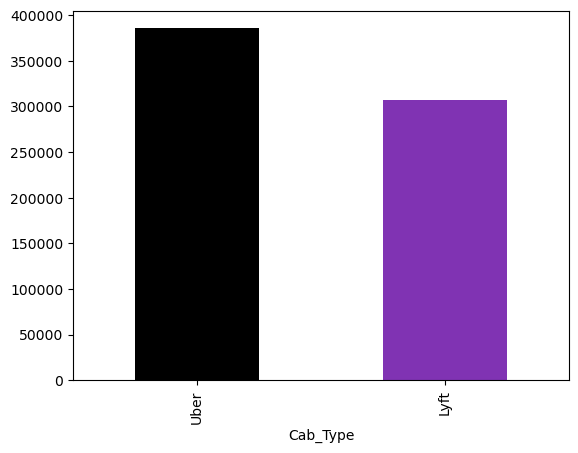

In [ ]:
# Count the values and plot
# setting colors of the bars
bar_colors = ['black', (0.5, 0.2, 0.7)]

df['Cab_Type'].value_counts().plot(kind='bar', color=bar_colors)

In [22]:
df['Cab_Type'].value_counts()

Cab_Type
Uber    385663
Lyft    307408
Name: count, dtype: int64

In [40]:
# Count occurrences of each ride type by Cab_Type
counts = df.groupby(['Cab_Type', 'Name']).size().unstack(fill_value=0)

<Figure size 1000x600 with 0 Axes>

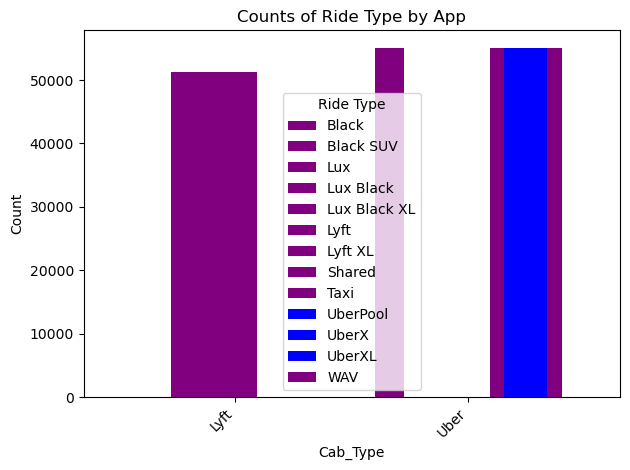

In [49]:
# Create a bar plot
plt.figure(figsize=(10, 6))

# Create bars for each cab type
counts.plot(kind='bar', width=0.8, color=['blue' if 'Uber' in name else 'purple' for name in counts.columns])

# Customize the x-ticks
plt.xticks(rotation=45, ha='right')

# Set labels and title
plt.ylabel('Count')
plt.title('Counts of Ride Type by App')
plt.legend(title='Ride Type')

# Show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='Name'>

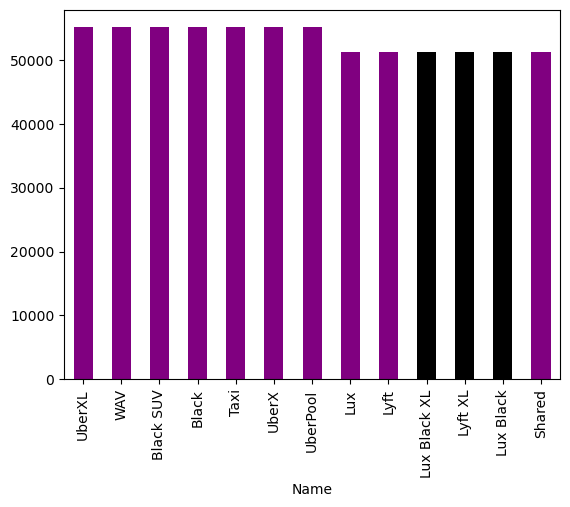

In [ ]:
bar_colors = ['black', (0.5, 0.2, 0.7)]

df['Name'].value_counts().plot(kind='bar', color=['black' if 'Uber' in name else 'purple' for name in counts.columns])

<Axes: xlabel='Temp'>

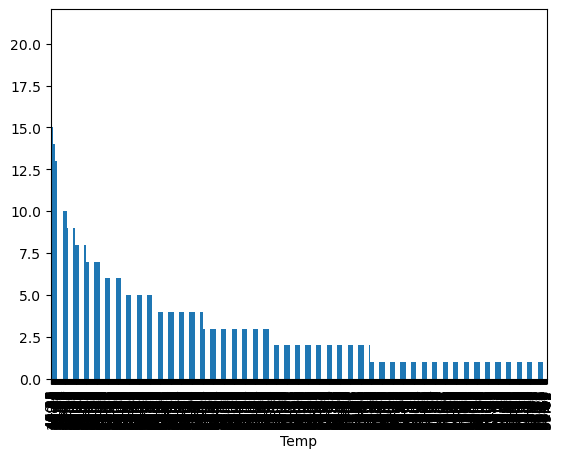

In [31]:
df2['Temp'].value_counts().plot(kind='bar')

In [ ]:
plt.subplots(4, 5, figsize=(15, 10))

count = 1

for col in df.columns:
    plt.subplot(4, 5, count)
    plt.hist(df[col])
    plt.title(col)
    
    count += 1
    
plt.show()

KeyboardInterrupt: 

In [ ]:
#


In [ ]:
#There are 385,663 rows in Product_ID column with a random UUID column.
#Standard UUIDs are 36 characters long including hyphens.

print(df['Product_ID'].unique())

['lyft_line' 'lyft_premier' 'lyft' 'lyft_luxsuv' 'lyft_plus' 'lyft_lux'
 '6f72dfc5-27f1-42e8-84db-ccc7a75f6969'
 '6c84fd89-3f11-4782-9b50-97c468b19529'
 '55c66225-fbe7-4fd5-9072-eab1ece5e23e'
 '9a0e7b09-b92b-4c41-9779-2ad22b4d779d'
 '6d318bcc-22a3-4af6-bddd-b409bfce1546'
 '997acbb5-e102-41e1-b155-9df7de0a73f2'
 '8cf7e821-f0d3-49c6-8eba-e679c0ebcf6a']


In [ ]:
df['Product_Type'] = df['Product_ID'].apply(lambda x: 'UUID' if len(x) == 36 and x.count('-') == 4 else x)
# Count the occurrences of each type
print(df['Product_Type'].value_counts())

Product_Type
UUID            385663
lyft_premier     51235
lyft             51235
lyft_luxsuv      51235
lyft_plus        51235
lyft_lux         51235
lyft_line        51233
Name: count, dtype: int64


In [ ]:
# space left to decide on `UUID` or `Unknown` for `Product_ID` column ^^^

In [ ]:
#For Weather dataset, missing values are replaced with zero in the `Rain` column 

df2['Rain'] = df2['Rain'].fillna(0.00)
print(df2['Rain'].head())

0    0.1228
1    0.1846
2    0.1089
3    0.0969
4    0.1786
Name: Rain, dtype: float64


In [ ]:
#Converting time_stamp column for cab_data and weather dataset
#time_stamp column measures to milliseconds, so, conversion unit = `ms`

df['Time_Stamp'] = pd.to_datetime(df['Time_Stamp'], unit='ms')
df2['Time_Stamp'] = pd.to_datetime(df2['Time_Stamp'], unit='ms')
print(df['Time_Stamp'].head())
print(df2['Time_Stamp'].head())

0   2018-10-20 01:46:40
1   2018-10-20 01:46:40
2   2018-10-20 01:46:40
3   2018-10-20 01:46:40
4   2018-10-20 01:46:40
Name: Time_Stamp, dtype: datetime64[ns]
0   1970-01-18 21:10:03.901
1   1970-01-18 21:10:03.901
2   1970-01-18 21:10:03.901
3   1970-01-18 21:10:03.901
4   1970-01-18 21:10:03.901
Name: Time_Stamp, dtype: datetime64[ns]


Look for Duplicated rows - <u>`cab_rides`</u> dataset

In [ ]:
#next step is to look at DUPLICATE ROWS
#use .duplicated()

df.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
693066    False
693067    False
693068    False
693069    False
693070    False
Length: 693071, dtype: bool

In [ ]:
#Sanity check
duplicate_count = df.duplicated().sum()
print(duplicate_count)

0


Look for Duplicated rows - <u>`weather`</u> dataset

In [ ]:
#next step is to look at DUPLICATE ROWS
#use .duplicated()

df2.duplicated()

0       False
1       False
2       False
3       False
4       False
        ...  
6271    False
6272    False
6273    False
6274    False
6275    False
Length: 6276, dtype: bool

In [ ]:
#Sanity check
duplicate_count2 = df2.duplicated().sum()
print(duplicate_count2)

0


Next, look for NULL values - <u>cab_rides</u> dataset

In [ ]:
#Look at the Number of NULLS for each column in cab_rides dataset

df.isna().sum()

#It can be seen that `Price` column has 55,095 Null values.

Distance                         0
Cab_Type                         0
Name                             0
Product_ID                       0
Time_Stamp                       0
Source / Pickup Location         0
Destination                      0
Price                        55095
Surge_Multiplier                 0
ID                               0
Unnamed: 10                 693070
dtype: int64

Next, look for NULL values - <u>weather</u> dataset

In [ ]:
#Look at the Number of NULLS for each column for weather dataset

df2.isna().sum()

#It can be seen that `Rain` column has 5,382 Null values.

Temp             0
Location         0
Clouds           0
Pressure         0
Rain          5382
Time_Stamp       0
Humidity         0
Wind             0
dtype: int64

Next, Visualize the data. 


`Map` the distribution of Numerical columns.

The <u>Numerical</u> columns for `cab_rides` dataset are as follows:

<ul>
  <li>Distance</li>
  <li>Timestamp</li>
  <li>Price</li>
  <li>Surge_Multiplier</li>
</ul>

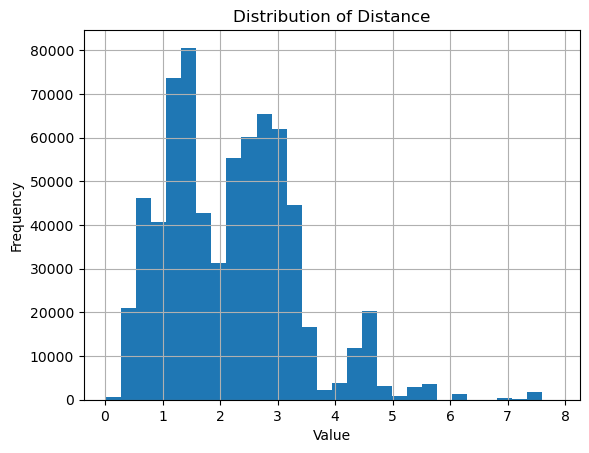

In [ ]:
#Mapping the distribution for `Distance` column 

df['Distance'].hist(bins=30) 
plt.title('Distribution of Distance')
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.show()

Ngl not sure if it's worth mapping out the timestamps? ask for feedback on this.

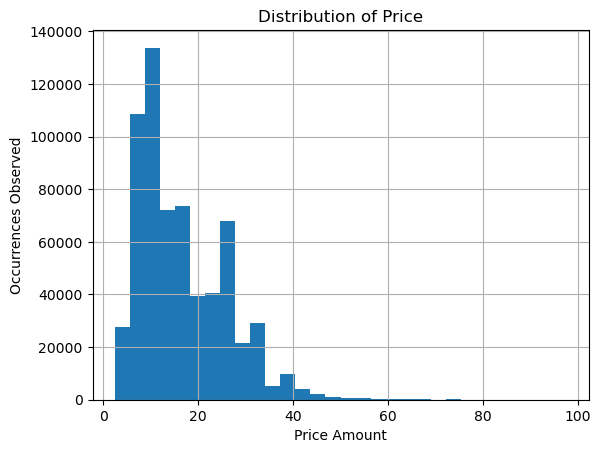

In [ ]:
#Mapping the distribution for `Price` column 

df['Price'].hist(bins=30) 
plt.title('Distribution of Price')
plt.xlabel('Price Amount')    #Check the dataset and determine if this in $ or not for specificity
plt.ylabel('Occurrences Observed')
plt.show()

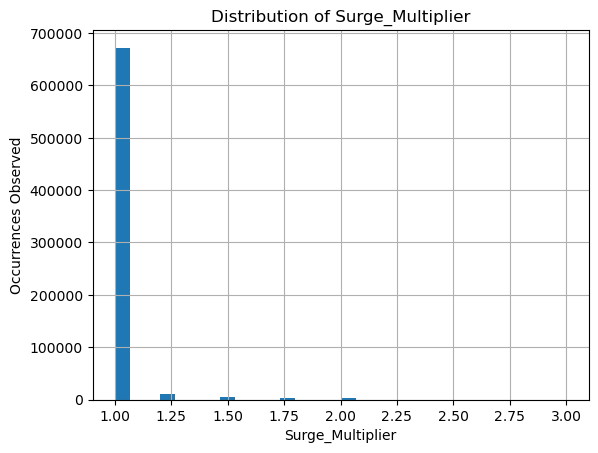

In [ ]:
#Mapping the distribution for `Surge_Multiplier` column 


df['Surge_Multiplier'].hist(bins=30) 
plt.title('Distribution of Surge_Multiplier')
plt.xlabel('Surge_Multiplier')    #Check the dataset and determine if this in $ or not for specificity
plt.ylabel('Occurrences Observed')
plt.show()

Visualize the data - cont. 


`Map` the distribution of Numerical columns.

The <u>Numerical</u> columns for `weather` dataset are as follows:

<ul>
  <li>Temp</li>
  <li>Clouds</li>
  <li>Pressure</li>
  <li>Rain</li>
  <li>Humidity</li>
  <li>Wind</li>
</ul>

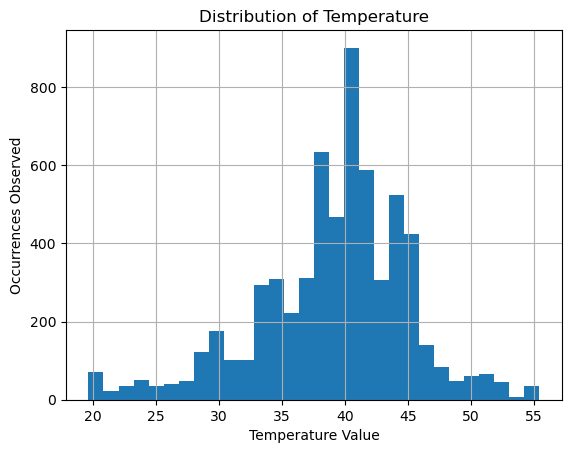

In [ ]:
#Mapping the distribution for `Temp` column 

df2['Temp'].hist(bins=30) 
plt.title('Distribution of Temperature')
plt.xlabel('Temperature Value')     #Check the dataset and determine if this in Fahrenheit or Celsius for specificity
plt.ylabel('Occurrences Observed')
plt.show()

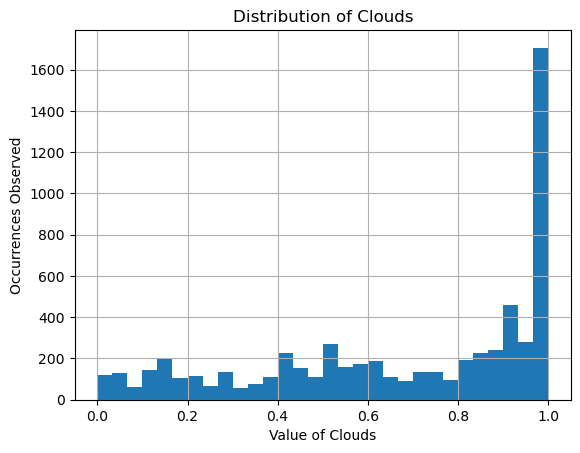

In [ ]:
#Mapping the distribution for `Clouds` column 

df2['Clouds'].hist(bins=30) 
plt.title('Distribution of Clouds')
plt.xlabel('Value of Clouds')     #Check the dataset to determine what this column actually shows
plt.ylabel('Occurrences Observed')
plt.show()

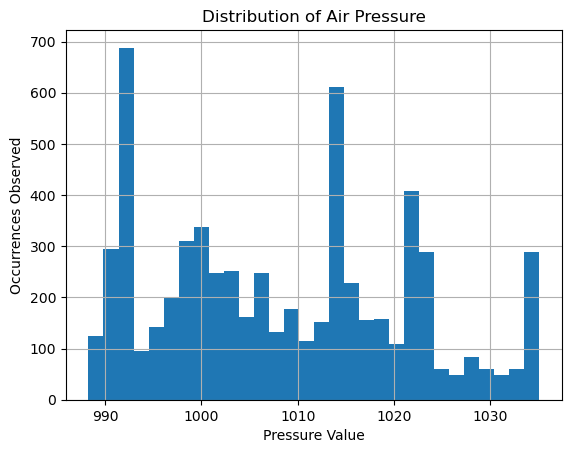

In [ ]:
#Mapping the distribution for `Pressure` column 

df2['Pressure'].hist(bins=30) 
plt.title('Distribution of Air Pressure')
plt.xlabel('Pressure Value')     #Check the dataset and determine what the pressure measurement should be? is it barometric pressure? be speicific and it'll help embellish stuff
plt.ylabel('Occurrences Observed')
plt.show()

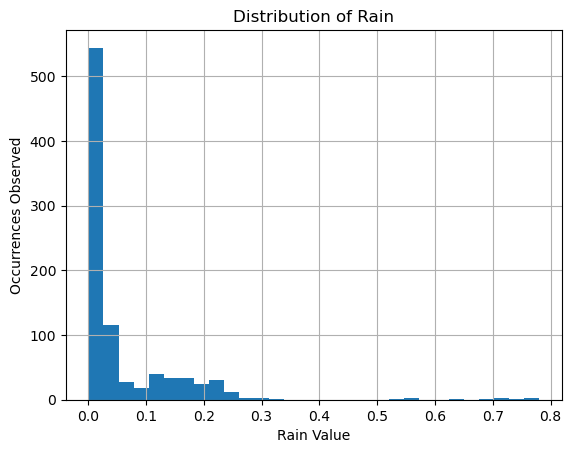

In [ ]:
#Mapping the distribution for `Rain` column 

df2['Rain'].hist(bins=30) 
plt.title('Distribution of Rain')
plt.xlabel('Rain Value')     #Check the dataset for measurement specifics
plt.ylabel('Occurrences Observed')
plt.show()

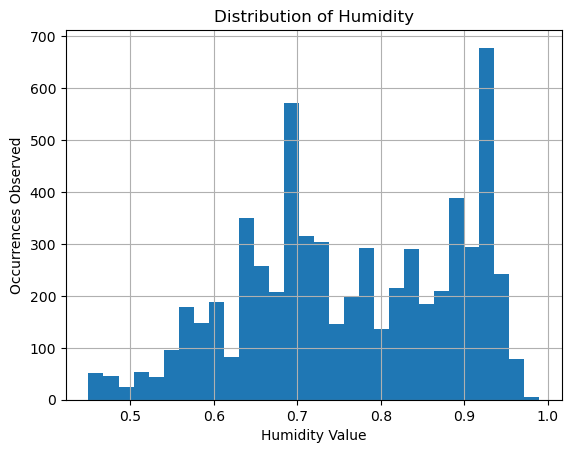

In [ ]:
#Mapping the distribution for `Humidity` column 

df2['Humidity'].hist(bins=30) 
plt.title('Distribution of Humidity')
plt.xlabel('Humidity Value')     #Check the dataset for measurement specifics
plt.ylabel('Occurrences Observed')
plt.show()

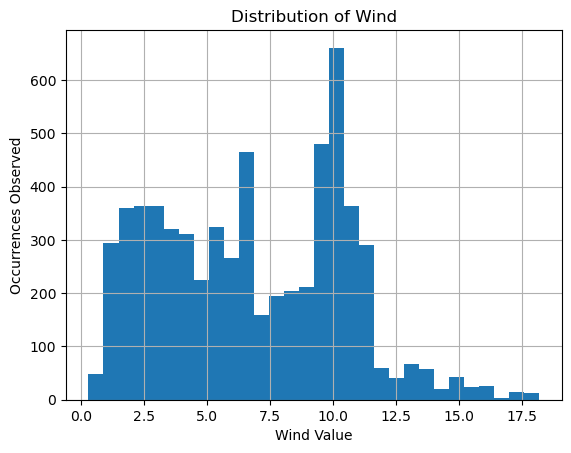

In [ ]:
#Mapping the distribution for `Rain` column 

df2['Wind'].hist(bins=30) 
plt.title('Distribution of Wind')
plt.xlabel('Wind Value')     #Check the dataset for measurement specifics
plt.ylabel('Occurrences Observed')
plt.show()

Visualize the data - cont.


`Plot` the distribution of Categorical columns.

The <u>Categorical</u> columns for `cab_rides` dataset are as follows:

<ul>
  <li>Cab_Type</li>
  <li>Name</li>
  <li>Product_ID</li>
  <li>Source / Pickup Location</li>
  <li>Destination</li>
  <li>ID</li>
</ul>

In [36]:
def can_see_stage(seats):
    # Transpose the seats matrix to check each column
    transposed = list(zip(*seats))
    
    # Check each column
    for column in transposed:
        for i in range(1, len(column)):
            if column[i] <= column[i - 1]:
                return False
    return True

# Example usage
seats = [
    [1, 2, 3, 2, 1, 1],
    [2, 4, 4, 3, 2, 2],
    [5, 5, 5, 5, 4, 4],
    [6, 6, 7, 6, 5, 5]
]

print(can_see_stage(seats))  # Output: False

True
